# Logistic REgression With ROC curve and ROC AUC Score

In [108]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [109]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [110]:

## Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [111]:
# generate a no skill prediction (majority  class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [112]:
# let's create a basic logistic model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
model_prob = model.predict_proba(x_test)

In [114]:
model_prob = model_prob[:,1]

In [115]:
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [116]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [117]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [118]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [119]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

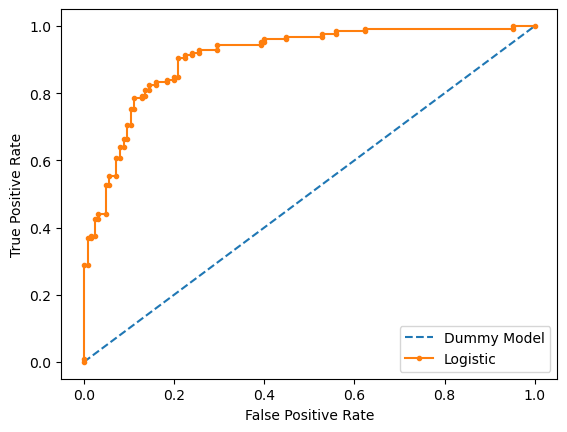

In [120]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

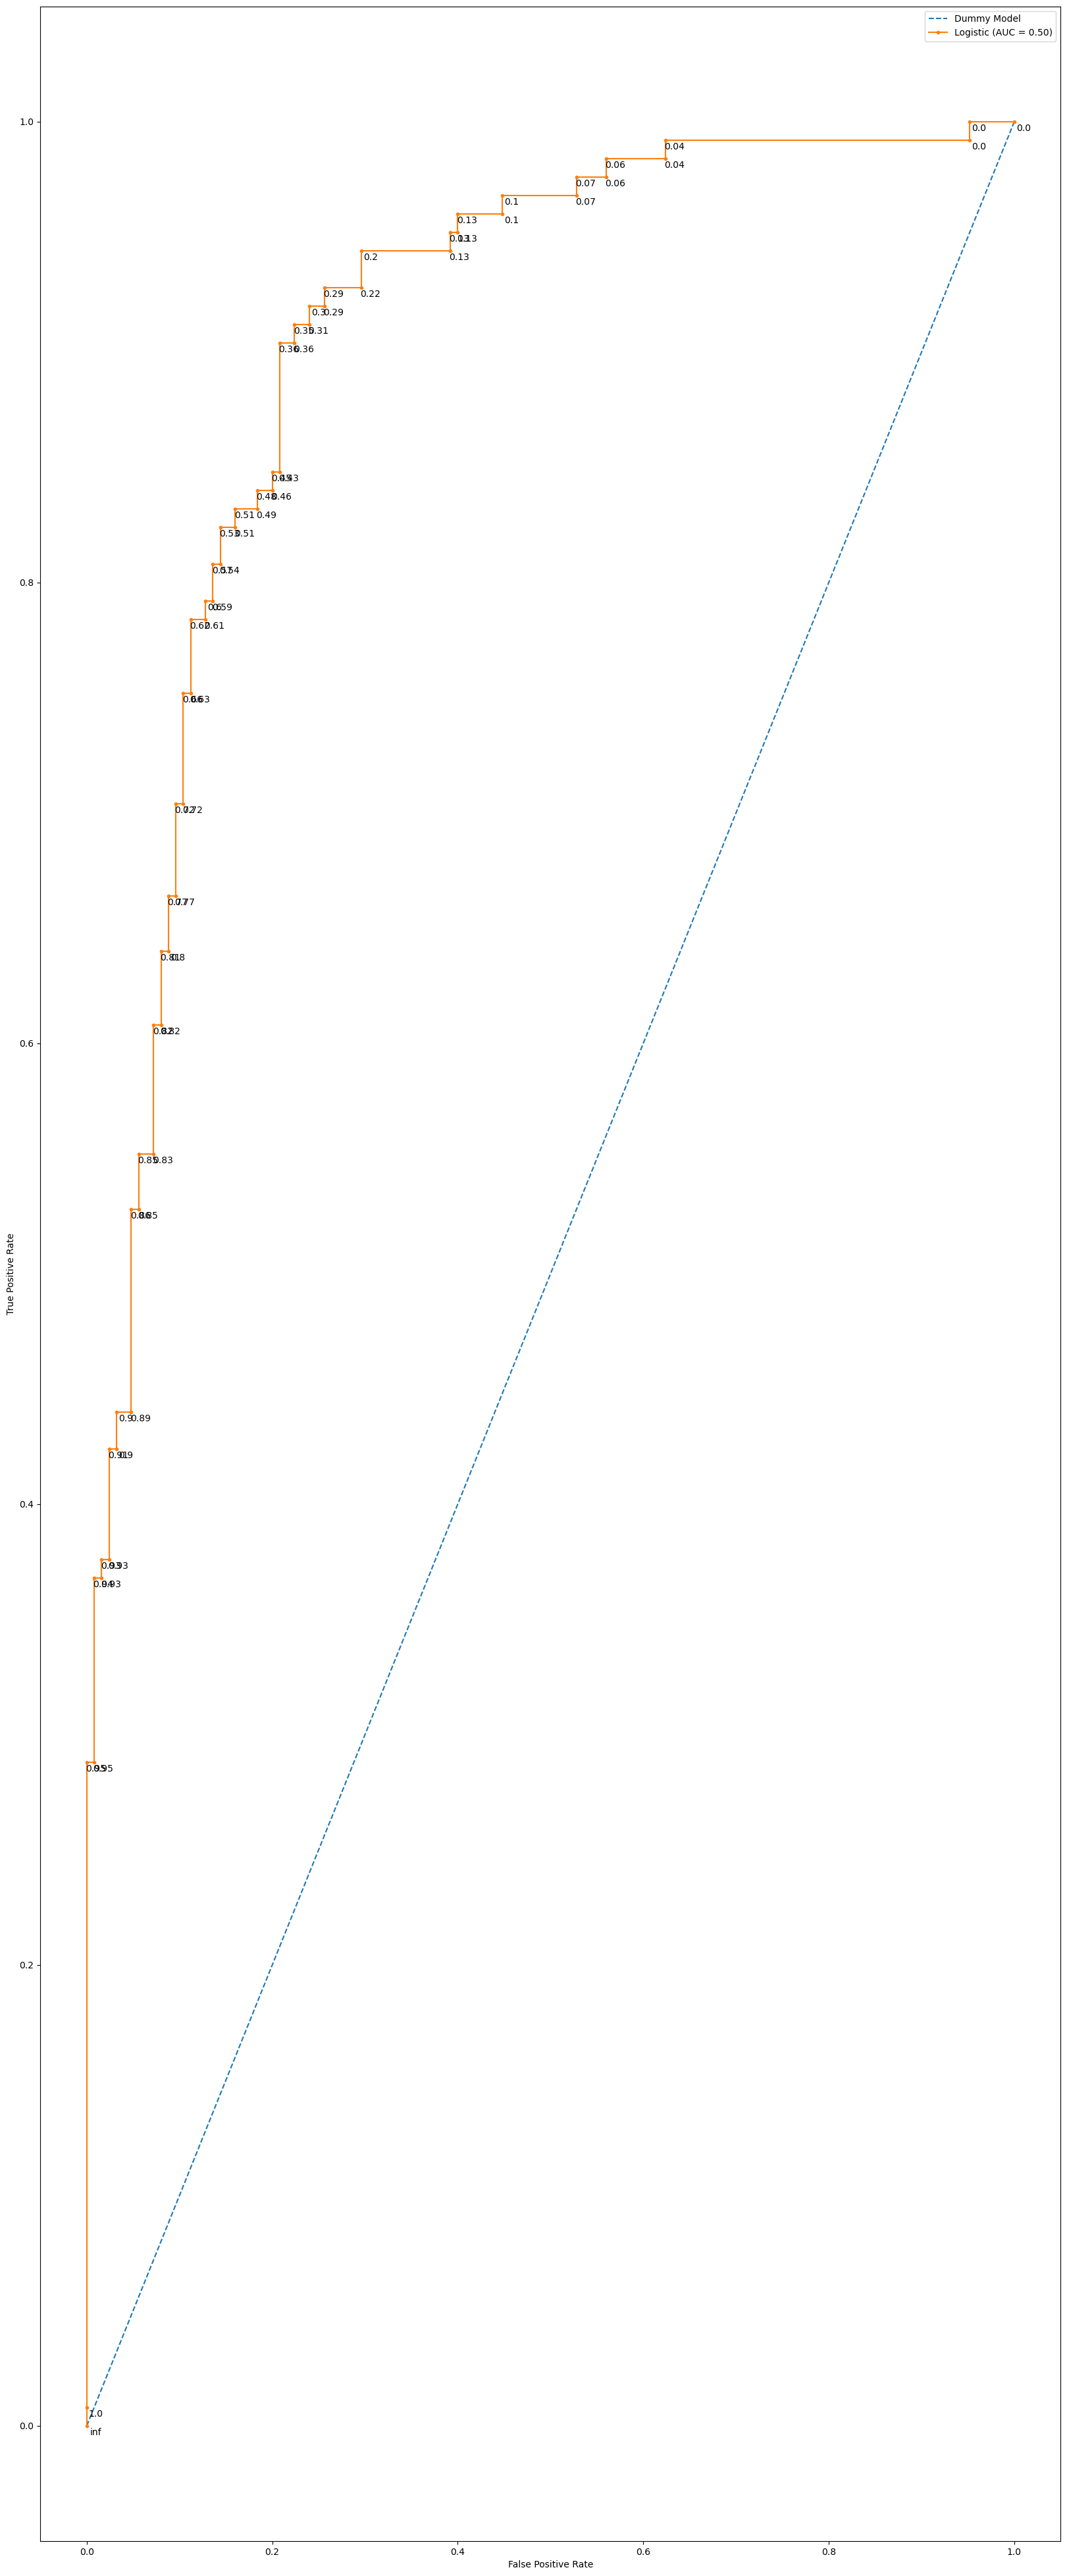

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming dummy_fpr, dummy_tpr, model_fpr, model_tpr, thresholds, y_true, y_pred_prob are defined
# fig = pyplot.figure(figsize=(20,50))
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test,dummy_model_prob)

# Create the figure
fig, ax = plt.subplots(figsize=(20,50))

# Plot the ROC curve for the dummy model
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')

# Plot the ROC curve for the logistic regression model
ax.plot(model_fpr, model_tpr, marker='.', label=f'Logistic (AUC = {roc_auc:.2f})')

# Annotate the ROC curve with threshold values
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(threshold, 2)}', xy=(fpr, tpr), textcoords="offset points", xytext=(10, -10), ha='center')

# Axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the legend
ax.legend()

# Show the plot
plt.show()


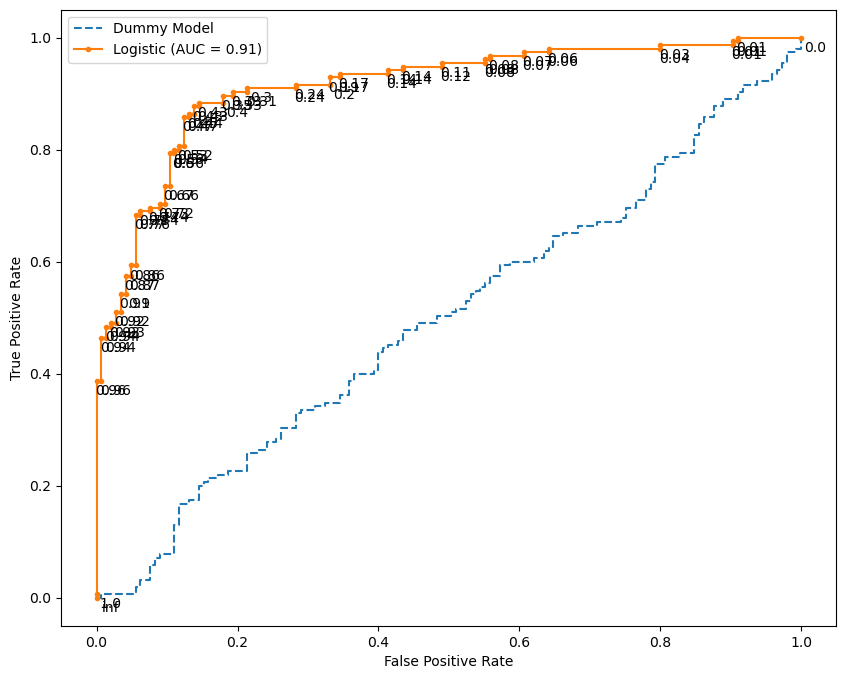

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a toy dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
model_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute FPR, TPR, and thresholds for the ROC curve
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, model_prob)

# Dummy classifier's FPR and TPR (for comparison)
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, np.random.rand(len(y_test)))  # Random probabilities

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the ROC curve for the dummy model
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')

# Plot the ROC curve for the logistic regression model
ax.plot(model_fpr, model_tpr, marker='.', label=f'Logistic (AUC = {roc_auc:.2f})')

# Annotate the ROC curve with threshold values
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(threshold, 2)}', xy=(fpr, tpr), textcoords="offset points", xytext=(10, -10), ha='center')

# Axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the legend
ax.legend()

# Show the plot
plt.show()
